# Connect to google account

In [1]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [2]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# Global Variables

In [269]:
import os
import numpy as np
import random
import torch

def reset_seeds(seed=500):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
  np.random.seed(seed)
  torch.manual_seed(seed) # cpu 연산 무작위 고정
  torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
  torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [270]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/AI_study/1. Machine Learning/3. Supervised Learning/original data/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'result/submission_0826.csv'
args.save_results = args.default_path+"result/model_results.json"

# 데이터 분석을 위한 변수들
# args.random_state = 500 # 위의 셀에서 고정 시킴
args.results = []

# Load Tritanic

- Surived:0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- gender:male=남성, female=여성
- Age: 나이
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴

In [271]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [272]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [273]:
pd.read_csv(args.default_submission_csv).shape

(393, 2)

In [274]:
ori_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [275]:
ori_train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [276]:
ori_train['passengerid'].nunique(), ori_train.shape[0]

(916, 916)

In [277]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [278]:
ori_test.set_index(['passengerid'], inplace=True)
print(f'{ori_test.shape}')
ori_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


# train_test_split

In [279]:
new_survived = pd.Categorical(ori_train["survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])

new_survived.describe()

,counts,freqs
categories,,
Died,570,0.622271
Survived,346,0.377729


In [280]:
from sklearn.model_selection import train_test_split

In [281]:
y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [282]:
reset_seeds()
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=ori_train['survived'])

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

# Base ModelV1 - age -> 표준분포 age로 통합 = overfitting

In [308]:
train = X_tr.copy()
test = X_te.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((641, 10), (275, 10), (393, 10))

## Data Preprocessing

In [309]:
print(f'before: {train.shape} / {test.shape}')
drop_cols = ['name', 'ticket', 'cabin']

train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)
ori_te.drop(drop_cols, axis=1, inplace=True)

print(f'after: {train.shape} / {test.shape}')
train.info()

before: (641, 10) / (275, 10)
after: (641, 7) / (275, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 641 entries, 582 to 286
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   gender    641 non-null    object 
 2   age       520 non-null    float64
 3   sibsp     641 non-null    int64  
 4   parch     641 non-null    int64  
 5   fare      641 non-null    float64
 6   embarked  640 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 40.1+ KB


In [310]:
reset_seeds()

# train
train['age_random'] = train['age']

# random sampling
random_sampling = (train['age'].dropna().sample(train['age'].isnull().sum()))
random_sampling.index = train[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
train.loc[train['age'].isnull(), 'age_random'] = random_sampling

# test

test['age_random'] = test['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(test['age'].isnull().sum()))
random_sampling.index = test[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
test.loc[test['age'].isnull(), 'age_random'] = random_sampling

# 확인
print(test[['age', 'age_random']].isnull().sum())


# ori_te

ori_te['age_random'] = ori_te['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(ori_te['age'].isnull().sum()))
random_sampling.index = ori_te[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
ori_te.loc[ori_te['age'].isnull(), 'age_random'] = random_sampling

# 확인
print(ori_te[['age', 'age_random']].isnull().sum())


# 확인
train[['age', 'age_random']].isnull().sum()
print(test.info())
print(ori_te.info())

age           59
age_random     0
dtype: int64
age           83
age_random     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 403 to 258
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      275 non-null    int64  
 1   gender      275 non-null    object 
 2   age         216 non-null    float64
 3   sibsp       275 non-null    int64  
 4   parch       275 non-null    int64  
 5   fare        275 non-null    float64
 6   embarked    275 non-null    object 
 7   age_random  275 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 19.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 916 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      393 non-null    int64  
 1   gender      393 non-null    object 
 2   age         310 non-null    float64
 3   sibsp       393

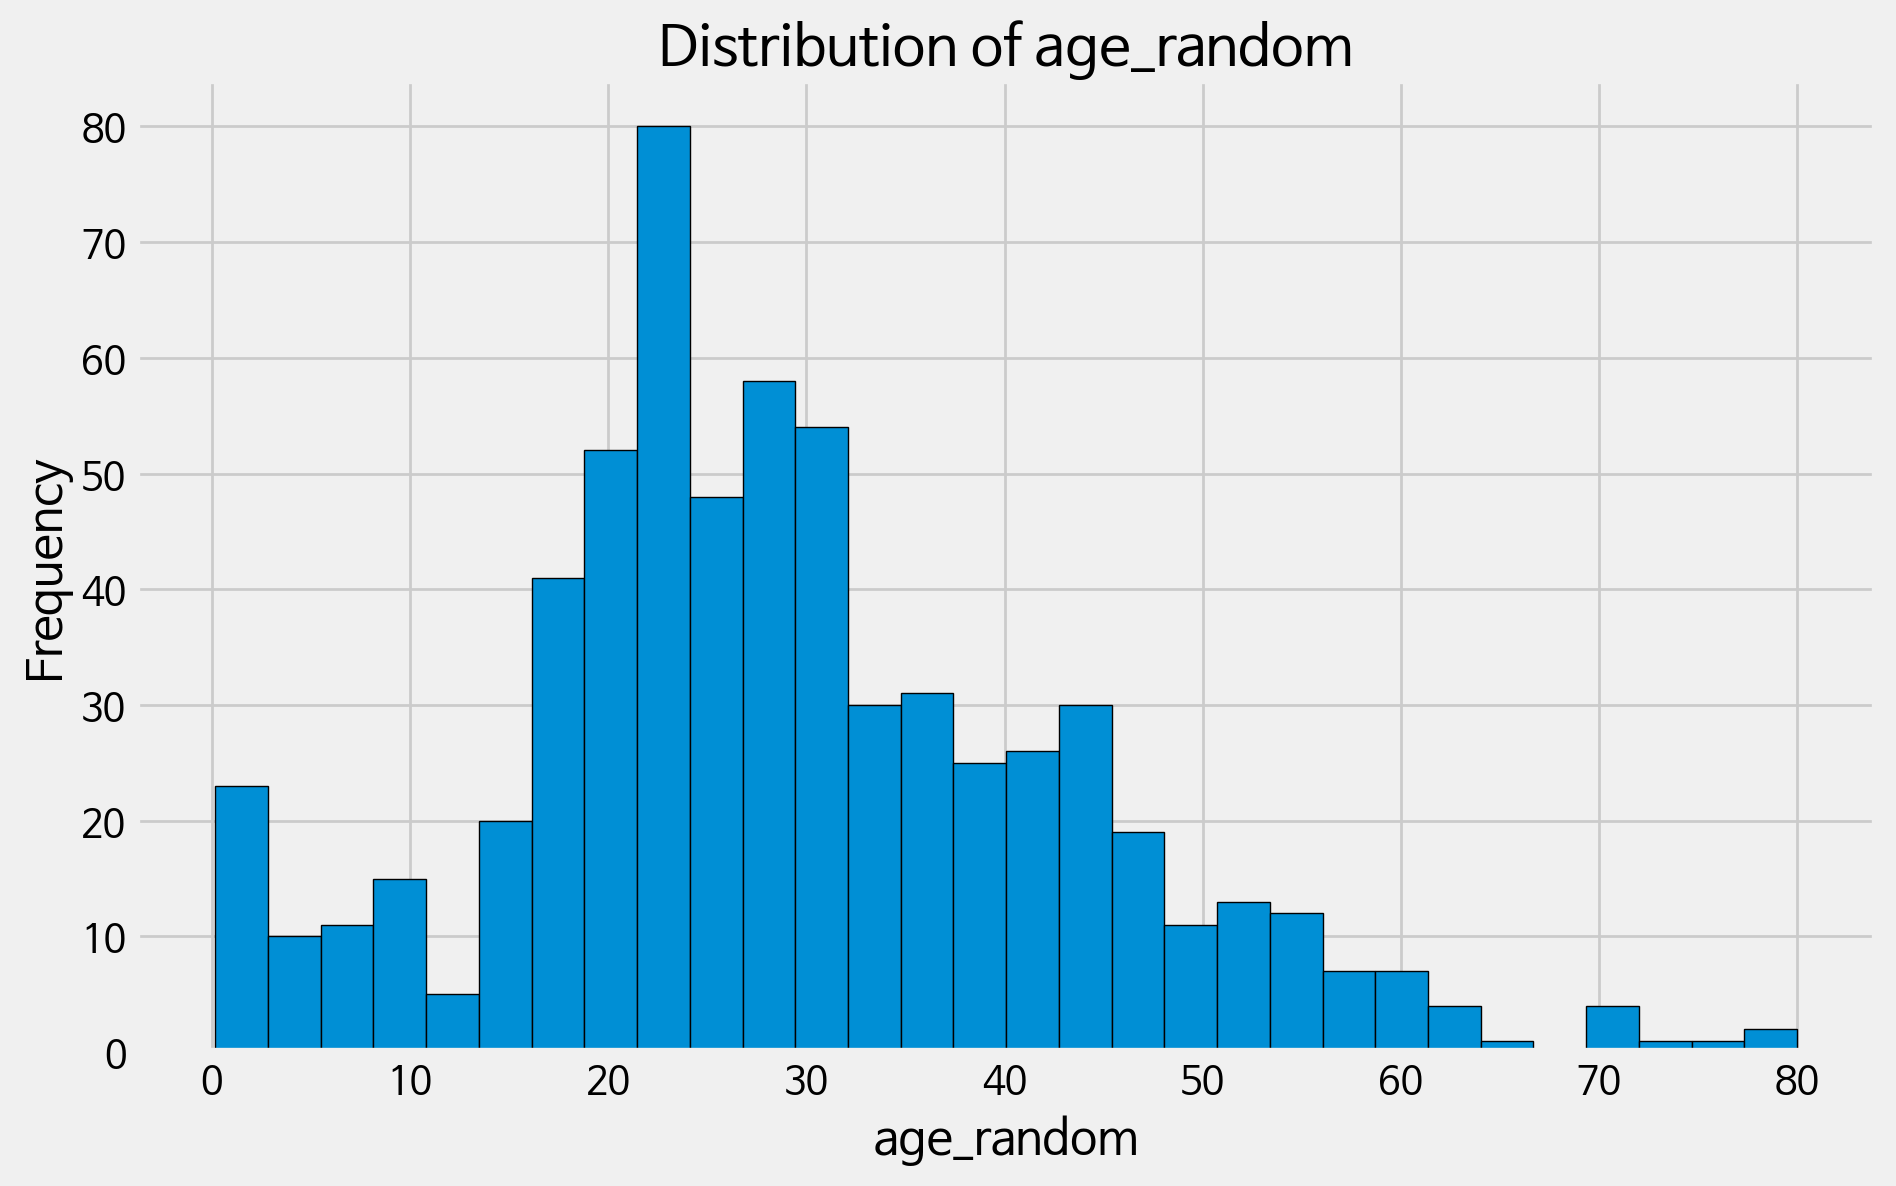

In [311]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train['age_random'], bins=30, edgecolor='black')
plt.title('Distribution of age_random')
plt.xlabel('age_random')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

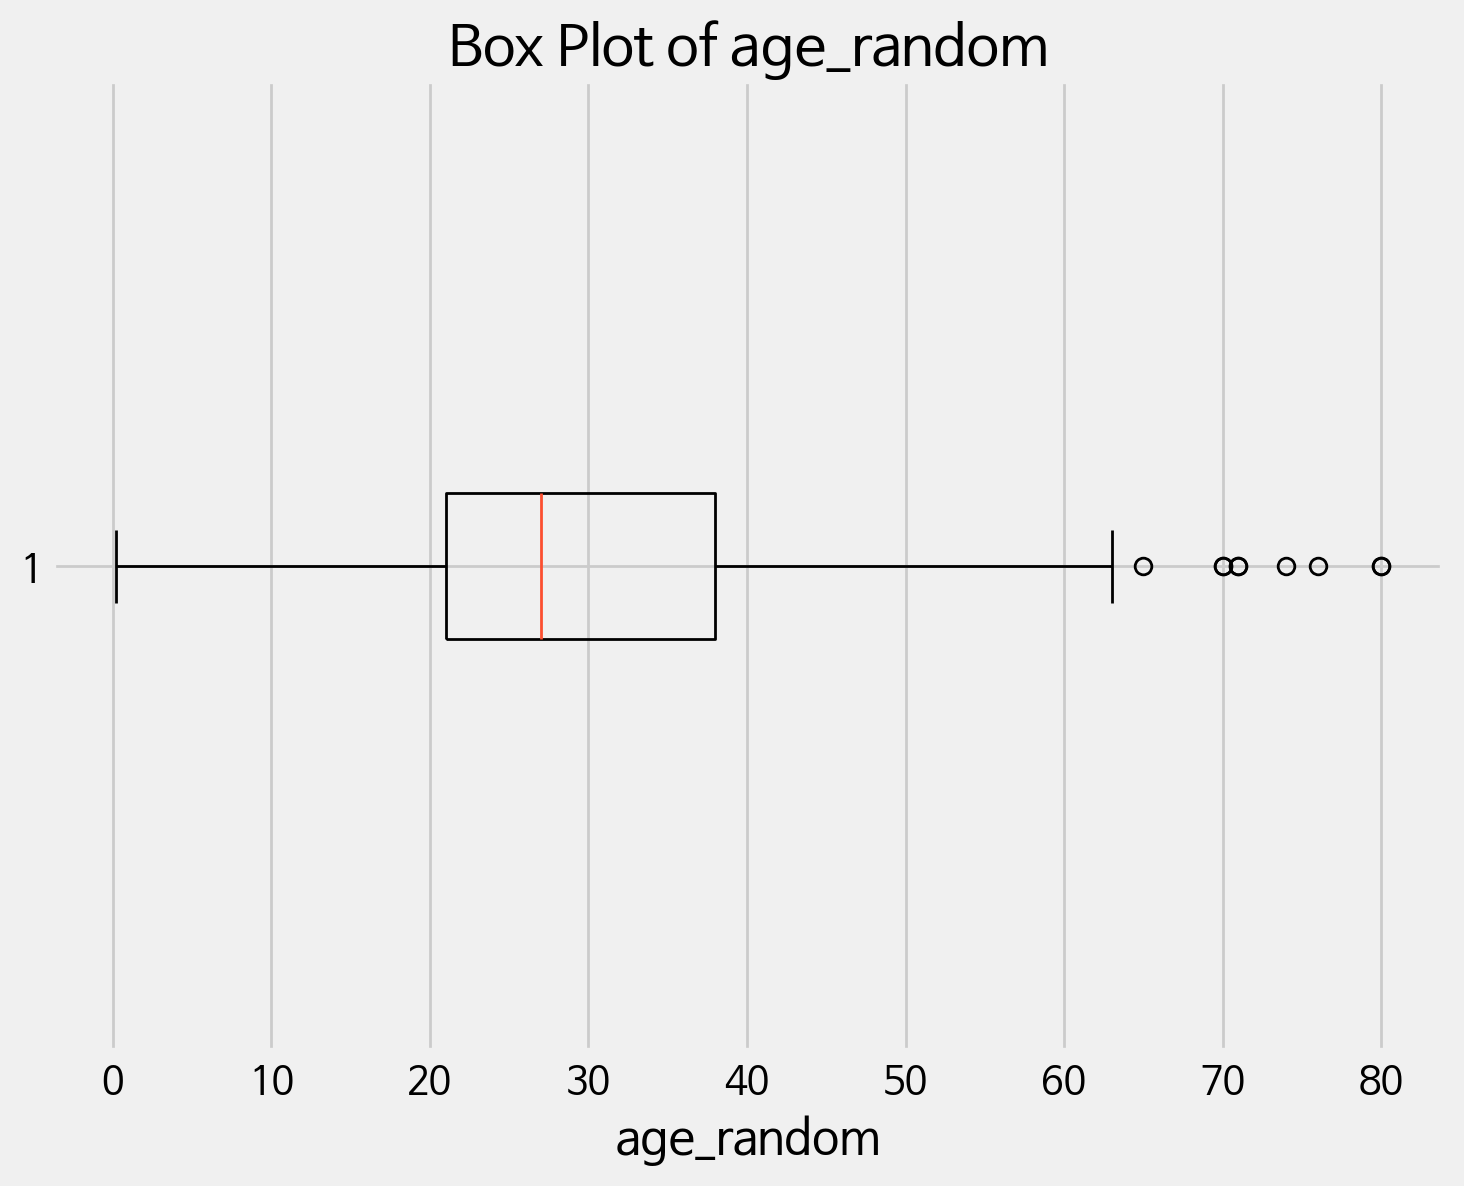

In [312]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(train['age_random'], vert=False)
plt.title('Box Plot of age_random')
plt.xlabel('age_random')
plt.grid(True)
plt.show()

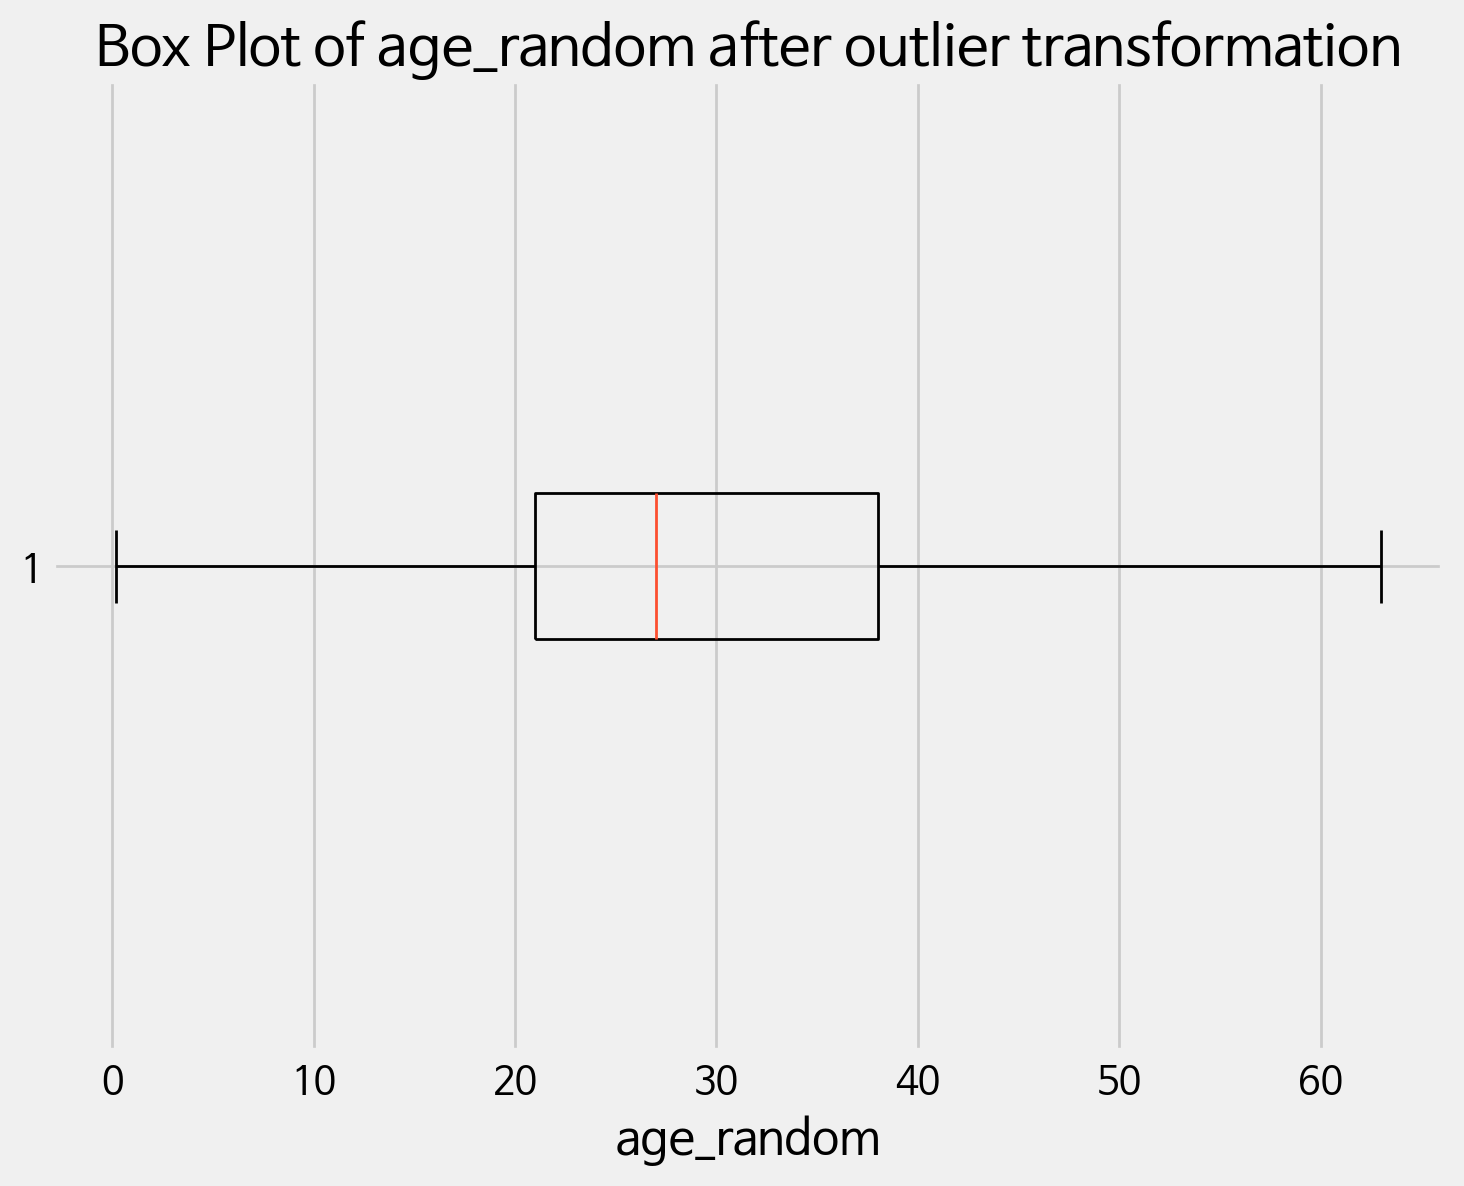

In [313]:
import numpy as np

Q1 = train['age_random'].quantile(0.25)
Q3 = train['age_random'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

max_non_outlier_value = train['age_random'][train['age_random'] <= upper_bound].max()
train['age_random'] = np.where(train['age_random'] > upper_bound, max_non_outlier_value, train['age_random'])
test['age_random'] = np.where(test['age_random'] > upper_bound, max_non_outlier_value, test['age_random'])
ori_te['age_random'] = np.where(ori_te['age_random'] > upper_bound, max_non_outlier_value, ori_te['age_random'])

plt.figure(figsize=(8, 6))
plt.boxplot(train['age_random'], vert=False)
plt.title('Box Plot of age_random after outlier transformation')
plt.xlabel('age_random')
plt.grid(True)
plt.show()

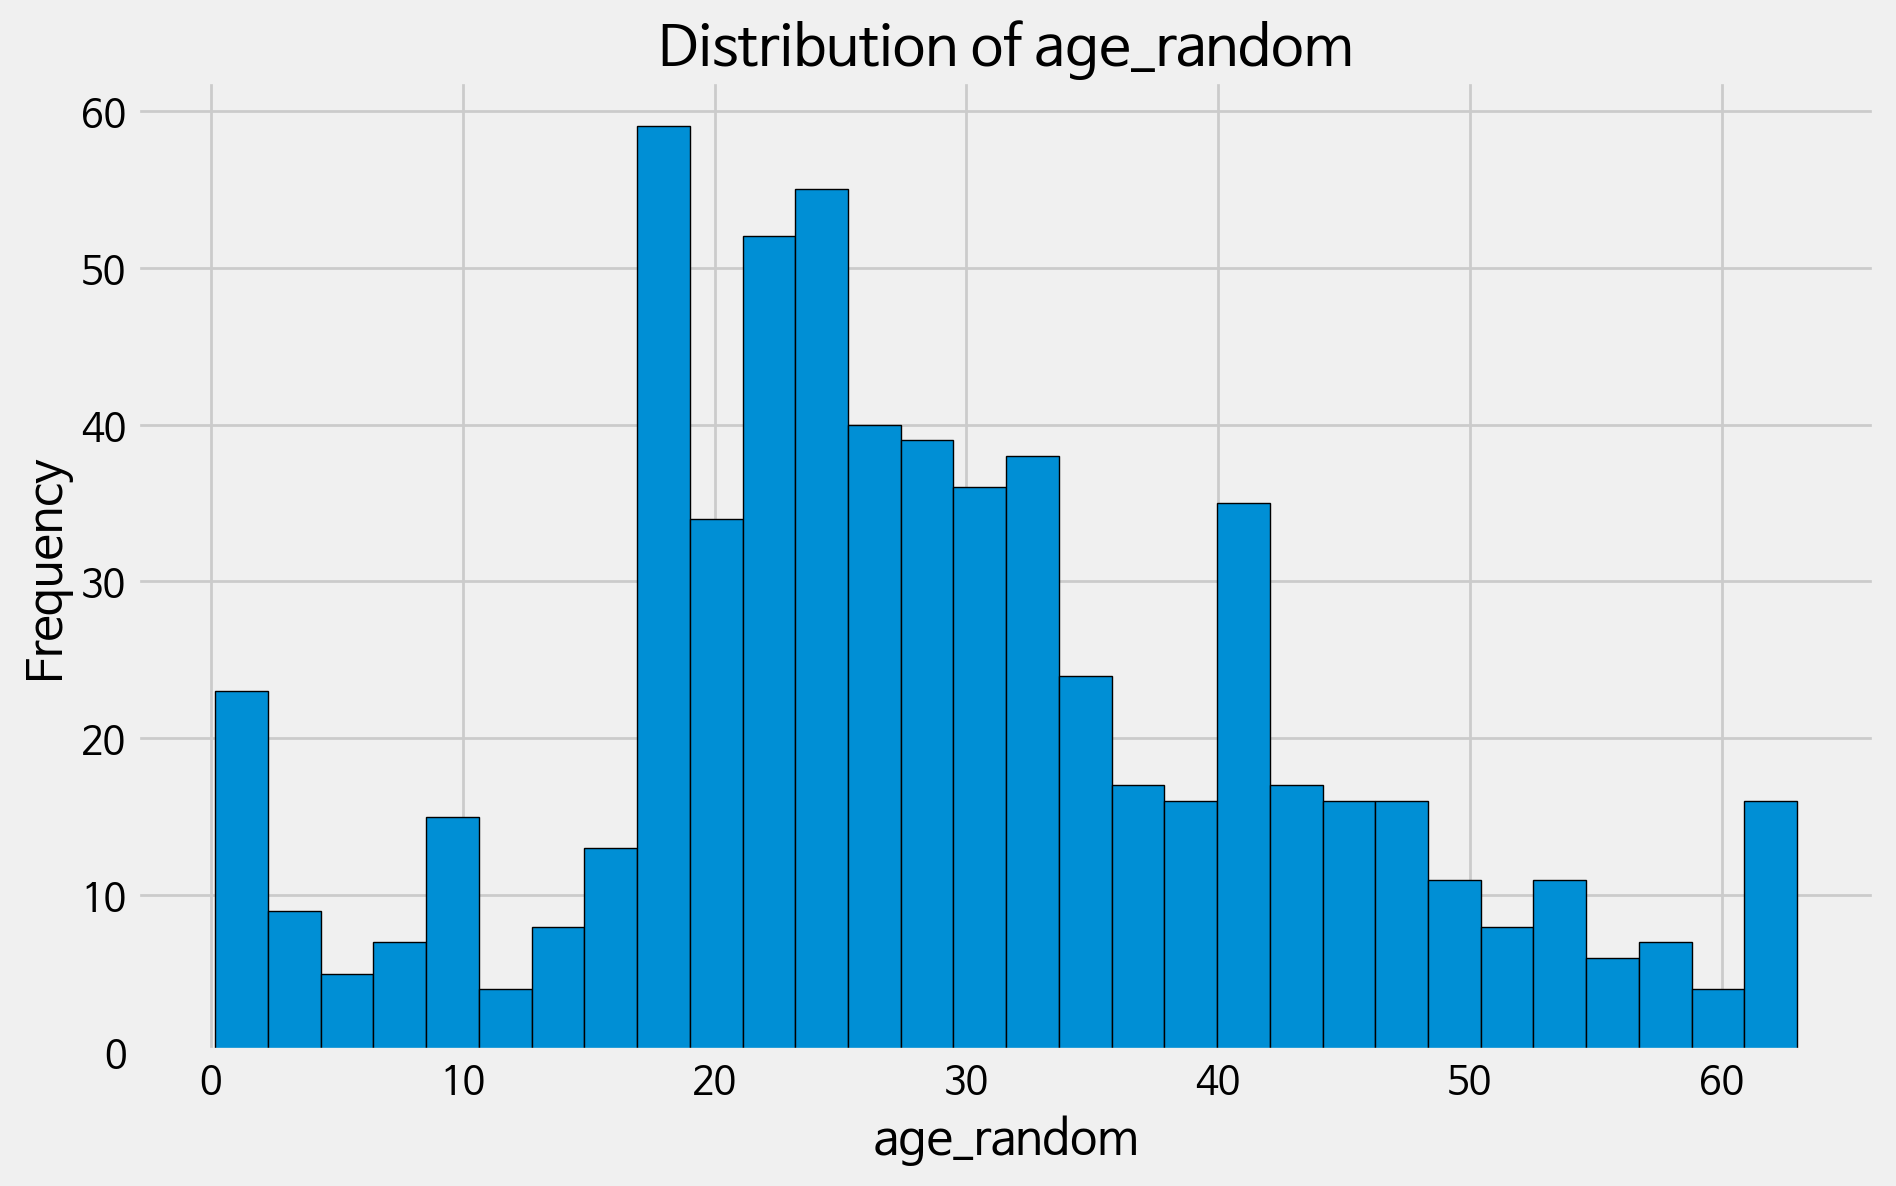

In [314]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train['age_random'], bins=30, edgecolor='black')
plt.title('Distribution of age_random')
plt.xlabel('age_random')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [315]:
# age_median = train['age'].median()
fare_median = train['fare'].mean()
embarked_mode = train['embarked'].mode().values[0]

fare_median, embarked_mode

(33.25776037441498, 'S')

In [316]:
# train['age'].fillna(age_median, inplace=True)
# test['age'].fillna(age_median, inplace=True)
# ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(121, 59, 83)

In [317]:
train.drop(['age'], axis=1, inplace=True)
test.drop(['age'], axis=1, inplace=True)
ori_te.drop(['age'], axis=1, inplace=True)

train.head()

,pclass,gender,sibsp,parch,fare,embarked,age_random
582,3,male,0,0,7.9250,S,32.0
781,2,male,0,0,11.5000,S,21.0
506,3,male,0,0,7.7750,S,21.0
772,3,male,0,0,7.8958,S,19.0
93,3,male,0,0,7.7750,S,63.0


In [318]:
train['pclass_str'] = train['pclass'].astype(str)
train['sibsp_str'] = train['sibsp'].astype(str)
train['parch_str'] = train['parch'].astype(str)

train['concatenated'] = train['pclass_str'] + train['sibsp_str'] + train['parch_str']

train.head()


,pclass,gender,sibsp,parch,fare,embarked,age_random,pclass_str,sibsp_str,parch_str,concatenated
582,3,male,0,0,7.9250,S,32.0,3,0,0,300
781,2,male,0,0,11.5000,S,21.0,2,0,0,200
506,3,male,0,0,7.7750,S,21.0,3,0,0,300
772,3,male,0,0,7.8958,S,19.0,3,0,0,300
93,3,male,0,0,7.7750,S,63.0,3,0,0,300


In [319]:
test['pclass_str'] = test['pclass'].astype(str)
test['sibsp_str'] = test['sibsp'].astype(str)
test['parch_str'] = test['parch'].astype(str)

test['concatenated'] = test['pclass_str'] + test['sibsp_str'] + test['parch_str']

ori_te['pclass_str'] = ori_te['pclass'].astype(str)
ori_te['sibsp_str'] = ori_te['sibsp'].astype(str)
ori_te['parch_str'] = ori_te['parch'].astype(str)

ori_te['concatenated'] = ori_te['pclass_str'] + ori_te['sibsp_str'] + ori_te['parch_str']

In [320]:
from sklearn.preprocessing import OneHotEncoder

In [321]:
enc_cols = ['gender', 'embarked']
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

['pclass',
 'pclass_str',
 'sibsp',
 'parch_str',
 'age_random',
 'concatenated',
 'parch',
 'sibsp_str',
 'fare']

In [322]:
print(f'before: {train.shape} / {test.shape}')

enc = OneHotEncoder()
# train
tmp_tr = pd.DataFrame(
    enc.fit_transform(train[enc_cols]).toarray(),
    columns = enc.get_feature_names_out()
)
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
)
# test
tmp_te = pd.DataFrame(
    enc.transform(test[enc_cols]).toarray(),
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(),
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)

print(f'after: {enc_tr.shape} / {enc_te.shape}')

before: (641, 11) / (275, 11)
after: (641, 14) / (275, 14)


Scaler

In [323]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_ori_te.isnull().sum().sum()

(0, 0, 0)

In [324]:
enc_tr.columns

Index(['pclass', 'pclass_str', 'sibsp', 'parch_str', 'age_random',
       'concatenated', 'parch', 'sibsp_str', 'fare', 'gender_female',
       'gender_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [325]:
scaling_cols = ['age_random', 'fare']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))
not_scaling_cols

['pclass',
 'pclass_str',
 'sibsp',
 'embarked_Q',
 'parch_str',
 'gender_female',
 'embarked_S',
 'embarked_C',
 'concatenated',
 'parch',
 'sibsp_str',
 'gender_male']

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:
std = StandardScaler()

_scaled_tr = std.fit_transform(enc_tr[scaling_cols])
_scaled_te = std.transform(enc_te[scaling_cols])
_scaled_ori_te = std.transform(enc_ori_te[scaling_cols])

In [328]:
print(f'before: {enc_tr.shape} / {enc_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr,
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te,
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te,
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape}')
scaled_tr.head()

before: (641, 14) / (275, 14)
after: (641, 14) / (275, 14)


,pclass,pclass_str,sibsp,embarked_Q,parch_str,gender_female,embarked_S,embarked_C,concatenated,parch,sibsp_str,gender_male,age_random,fare
0,3,3,0,0.0,0,0.0,1.0,0.0,300,0,0,1.0,0.208951,-0.472361
1,2,2,0,0.0,0,0.0,1.0,0.0,200,0,0,1.0,-0.587044,-0.405701
2,3,3,0,0.0,0,0.0,1.0,0.0,300,0,0,1.0,-0.587044,-0.475158
3,3,3,0,0.0,0,0.0,1.0,0.0,300,0,0,1.0,-0.731770,-0.472906
4,3,3,0,0.0,0,0.0,1.0,0.0,300,0,0,1.0,2.452209,-0.475158


## Training

In [329]:
scaled_tr.isnull().sum().sum(), scaled_te.isnull().sum().sum(), scaled_ori_te.isnull().sum().sum()

(0, 0, 0)

In [330]:
scaled_tr.shape, scaled_te.shape, scaled_ori_te.shape

((641, 14), (275, 14), (393, 14))

In [331]:
from sklearn.tree import DecisionTreeClassifier

In [332]:
reset_seeds()
modelV1 = DecisionTreeClassifier()

modelV1.fit(scaled_tr, y_tr)

DecisionTreeClassifier()

## Evaluation

In [333]:
score_tr = modelV1.score(scaled_tr, y_tr)
score_te = modelV1.score(scaled_te, y_te)

score_tr, score_te

(0.9921996879875195, 0.7890909090909091)

In [334]:
from sklearn.metrics import roc_curve, auc

y_pred = modelV1.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.7727732793522267


In [335]:
ori_te_pred = modelV1.predict_proba(scaled_ori_te)[:,1]
ori_te_pred.shape

(393,)

In [336]:
df_feature_importances = pd.DataFrame(modelV1.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()
print(f'{df_feature_importances.shape}')

(14, 2)


In [337]:
args.results.append(
    {
        'model': 'modelV4',
        'score_tr': score_tr,
        'score_te': score_te,
        'auc_te': auc_te,
        'ori_te_pred': ori_te_pred,
        'len_features': X_tr.shape[1],
        'feaute_importances': list(df_feature_importances['index'].values[:X_tr.shape[1]]),
        'create_dt': '0217'
    }
)

len(args.results)

1

# Submission

In [338]:
df_results = pd.DataFrame(args.results).sort_values(by=['auc_te'], ascending=False)
df_results

,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
0,modelV4,0.9922,0.789091,0.772773,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",10,"[gender_male, fare, age_random, concatenated, ...",0217


In [339]:
submission = pd.read_csv(args.default_submission_csv)
submission.head()

,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [340]:
submission['survived'] = df_results.loc[0, ['ori_te_pred']].values[0]

print(f'{submission.isnull().sum().sum()}')
submission.head(10)

0


,passengerid,survived
0,916,1.0
1,917,1.0
2,918,1.0
3,919,0.0
4,920,1.0
5,921,1.0
6,922,0.0
7,923,0.0
8,924,1.0
9,925,0.0


In [341]:
submission.to_csv(args.submission_csv, header=True, index=False)

# Save Results

In [342]:
args.save_results

'/content/data/MyDrive/AI_study/1. Machine Learning/3. Supervised Learning/original data/result/model_results.json'

In [343]:
df_results.columns

Index(['model', 'score_tr', 'score_te', 'auc_te', 'ori_te_pred',
       'len_features', 'feaute_importances', 'create_dt'],
      dtype='object')

In [344]:
df_results.drop(['ori_te_pred'], axis=1, inplace=True)

In [345]:
df_results.to_json(args.save_results, orient="records")

In [346]:
# 어떤 모델이 일을 잘했는지 확인 가능
df_results.head()

,model,score_tr,score_te,auc_te,len_features,feaute_importances,create_dt
0,modelV4,0.9922,0.789091,0.772773,10,"[gender_male, fare, age_random, concatenated, ...",0217


In [347]:
import json

load_results = None
with open(args.save_results, 'r') as file:
    load_results = json.load(file)

load_results

[{'model': 'modelV4',
  'score_tr': 0.992199688,
  'score_te': 0.7890909091,
  'auc_te': 0.7727732794,
  'len_features': 10,
  'feaute_importances': ['gender_male',
   'fare',
   'age_random',
   'concatenated',
   'sibsp_str',
   'embarked_C',
   'sibsp',
   'embarked_S',
   'parch',
   'parch_str'],
  'create_dt': '0217'}]